# Intro
After seeing many friends share Mental Floss's [post](https://www.facebook.com/mentalflossmagazine/photos/a.10150287971007365.366498.10974002364/10155468201717365/?type=3&theater) about this being a week of palindromes, I wanted to calculate how surprised I'm supposed to be...

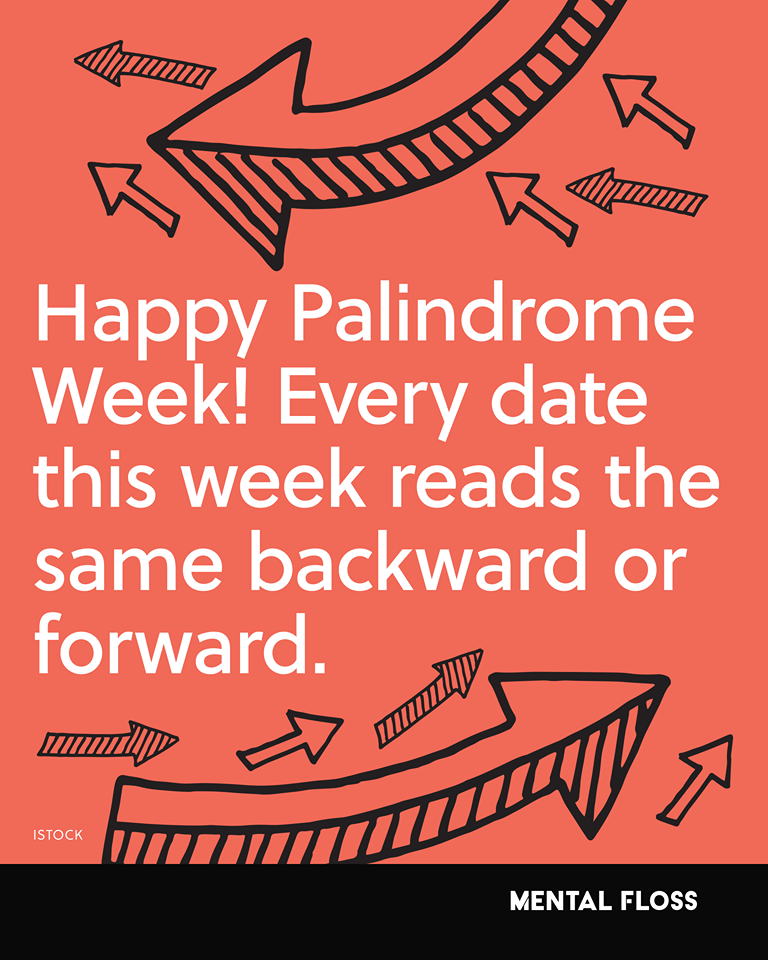

In [199]:
from IPython.display import Image
Image(r'https://scontent.xx.fbcdn.net/v/t1.0-9/19748431_10155468201717365_371445960501529789_n.png?oh=3077ce1e02a7ee315a3c090ec4927ec5&oe=59CE647A', format='png')

# Initialization

In [161]:
%matplotlib inline
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set(context='poster')

# Set up the data
 - Get a sequence of days for my life
 - create a function for determining if a date is a palindrome

In [3]:
birthday = datetime(1986, 8, 23)

In [16]:
birthday + timedelta(days=1)

datetime.datetime(1986, 8, 24, 0, 0)

## Date Formatter
 - For this to work we need to omit the leading zero on days and months, and use 2-digit years
 - It's notable that this is a very American date format, most sensible locales do something more orderly (d/m/yy) or easily sortable (yy/m/d)

In [72]:
def get_datestr(date):
    return date.strftime('%m').lstrip('0') + date.strftime('%d').lstrip('0') + date.strftime('%y')

get_datestr(datetime.today())

'71217'

A bit morbid, but way better than importing an actuarial library...

In [183]:
deathday = birthday + timedelta(days=365.25*100)
deathday

datetime.datetime(2086, 8, 23, 0, 0)

## Get the list of all my days

In [185]:
days = [birthday + timedelta(days=i) for i in range((deathday - birthday).days)]
days[:5], days[-5:]

([datetime.datetime(1986, 8, 23, 0, 0),
  datetime.datetime(1986, 8, 24, 0, 0),
  datetime.datetime(1986, 8, 25, 0, 0),
  datetime.datetime(1986, 8, 26, 0, 0),
  datetime.datetime(1986, 8, 27, 0, 0)],
 [datetime.datetime(2086, 8, 18, 0, 0),
  datetime.datetime(2086, 8, 19, 0, 0),
  datetime.datetime(2086, 8, 20, 0, 0),
  datetime.datetime(2086, 8, 21, 0, 0),
  datetime.datetime(2086, 8, 22, 0, 0)])

## Palindrome functions

In [186]:
def is_palindrome(text):
    return text == text[::-1]

In [105]:
is_palindrome('bob')

True

In [106]:
def is_palindrome_date(date):
    return is_palindrome(get_datestr(date))

## Get the subset of palindrome dates

In [107]:
palindrome_dates = [d for d in days if is_palindrome_date(d)]

### All the Palindromes!

In [108]:
palindrome_dates

[datetime.datetime(1987, 7, 8, 0, 0),
 datetime.datetime(1988, 8, 8, 0, 0),
 datetime.datetime(1989, 9, 8, 0, 0),
 datetime.datetime(1991, 1, 9, 0, 0),
 datetime.datetime(1992, 2, 9, 0, 0),
 datetime.datetime(1993, 3, 9, 0, 0),
 datetime.datetime(1994, 4, 9, 0, 0),
 datetime.datetime(1995, 5, 9, 0, 0),
 datetime.datetime(1996, 6, 9, 0, 0),
 datetime.datetime(1997, 7, 9, 0, 0),
 datetime.datetime(1998, 8, 9, 0, 0),
 datetime.datetime(1999, 9, 9, 0, 0),
 datetime.datetime(2001, 10, 1, 0, 0),
 datetime.datetime(2001, 10, 2, 0, 0),
 datetime.datetime(2001, 10, 3, 0, 0),
 datetime.datetime(2001, 10, 4, 0, 0),
 datetime.datetime(2001, 10, 5, 0, 0),
 datetime.datetime(2001, 10, 6, 0, 0),
 datetime.datetime(2001, 10, 7, 0, 0),
 datetime.datetime(2001, 10, 8, 0, 0),
 datetime.datetime(2001, 10, 9, 0, 0),
 datetime.datetime(2001, 10, 11, 0, 0),
 datetime.datetime(2001, 10, 22, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 11, 0, 0

# Analysis

## A lifetime of Palindromes

In [109]:
len(palindrome_dates)

306

## Probability of Palindromity

In [110]:
len(palindrome_dates) / (100*365.25)

0.00837782340862423

## Palindromes Remaining

In [111]:
len([d for d in palindrome_dates if d > datetime.today()])

202

## Future Probability of Palindromity

In [112]:
len([d for d in palindrome_dates if d > datetime.today()]) / (len([d for d in days if d > datetime.today()]))

0.00800221843679436

In [113]:
1/0.008

125.0

## Near-term rates

In [114]:
len([d for d in palindrome_dates if d > datetime.today()]) / (len([d for d in days if d > datetime.today() and d < datetime(2030, 1, 1)]))

0.04434687156970362

## The Palindrought

In [120]:
deathday = birthday + timedelta(days=365.25*200)
days = [birthday + timedelta(days=i) for i in range((deathday - birthday).days)]
palindrome_dates_200 = [d for d in days if is_palindrome_date(d)]
palindrome_dates_200[300:330]

[datetime.datetime(2081, 1, 8, 0, 0),
 datetime.datetime(2082, 2, 8, 0, 0),
 datetime.datetime(2083, 3, 8, 0, 0),
 datetime.datetime(2084, 4, 8, 0, 0),
 datetime.datetime(2085, 5, 8, 0, 0),
 datetime.datetime(2086, 6, 8, 0, 0),
 datetime.datetime(2087, 7, 8, 0, 0),
 datetime.datetime(2088, 8, 8, 0, 0),
 datetime.datetime(2089, 9, 8, 0, 0),
 datetime.datetime(2091, 1, 9, 0, 0),
 datetime.datetime(2092, 2, 9, 0, 0),
 datetime.datetime(2093, 3, 9, 0, 0),
 datetime.datetime(2094, 4, 9, 0, 0),
 datetime.datetime(2095, 5, 9, 0, 0),
 datetime.datetime(2096, 6, 9, 0, 0),
 datetime.datetime(2097, 7, 9, 0, 0),
 datetime.datetime(2098, 8, 9, 0, 0),
 datetime.datetime(2099, 9, 9, 0, 0),
 datetime.datetime(2101, 10, 1, 0, 0),
 datetime.datetime(2101, 10, 2, 0, 0),
 datetime.datetime(2101, 10, 3, 0, 0),
 datetime.datetime(2101, 10, 4, 0, 0),
 datetime.datetime(2101, 10, 5, 0, 0),
 datetime.datetime(2101, 10, 6, 0, 0),
 datetime.datetime(2101, 10, 7, 0, 0),
 datetime.datetime(2101, 10, 8, 0, 0),
 dat

In [187]:
(datetime(2111,1,1) - datetime(2101,10,23)).days / 365.25

9.190965092402465

# Visualization

In [188]:
df_dates = pd.DataFrame({'palindromes': palindrome_dates_200})

## Historic Histogram

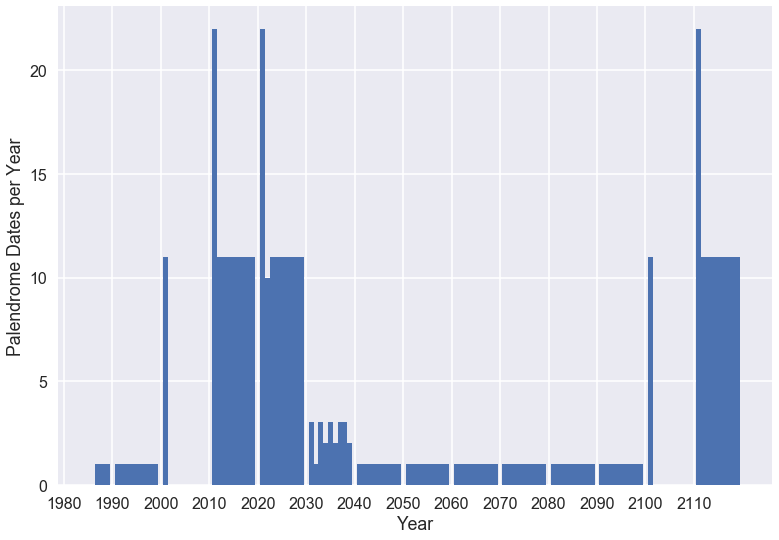

In [189]:
pal_by_year = df_dates.groupby(df_dates.palindromes.dt.year).count()
pal_by_year2 = []
years = np.arange(1986, 2120)
for year in years:
    if year in pal_by_year.index:
        pal_by_year2.append(pal_by_year.loc[year]['palindromes'])
    else:
        pal_by_year2.append(0)

plt.gca().xaxis.set_ticks(np.arange(1980, 2120, 10))
plt.bar(years, pal_by_year2, 1.0)
plt.ylabel('Pilendrome Dates per Year')
plt.xlabel('Year')